https://github.com/KeremTurgutlu/dicom-contour/blob/master/tutorial.ipynb

In [1]:
from dicom_contour.contour import *
import torchio as tio
import torch

In [31]:
# example patient path
path ='/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON_ABNORMAL/P0439C0006I13364175/CT/1.3.6.1.4.1.32722.228.6.21873895306403579259490218451487507663'

In [32]:
# let's store our dicom file for the rest of the introduction
contour_file = get_contour_file(path)

In [4]:
contour_data = dicom.read_file(path + '/' + contour_file)

In [5]:
# get the contour file for this patient
get_contour_file(path)

'1.3.6.1.4.1.32722.228.6.126839917326611081500227104497997677908.dcm'

In [6]:
get_roi_names(contour_data)

['Spinal Cord',
 'Heart',
 'MediastEnvelop',
 'MedEnv_05',
 'Lungs-GTV',
 'Carina',
 'Carina_2',
 'Spinal Cord_3',
 'CTVp1_05',
 'GTVp1',
 'BODY',
 'Esophagus',
 'Lungs-PTV_5',
 'Lung R',
 'Lung L',
 'CTVp1_05_03',
 'CTV2',
 'Lung L-CTV_03',
 'MedEnv_inCTV_07',
 'External_grootFO',
 'Pillow_Lung_NoDe',
 'Lung_treatment_T',
 'Rail2A',
 'Rail1A',
 'box',
 'isogem',
 'mid_2',
 'mid_0',
 'mid_1']

In [16]:
# get all image-contour array pairs
contour_arrays = cfile2pixels(file=contour_file, path=path, ROIContourSeq=10)

In [17]:
# get first image - contour array
first_image, first_contour, img_id = contour_arrays

ValueError: too many values to unpack (expected 3)

NameError: name 'first_image' is not defined

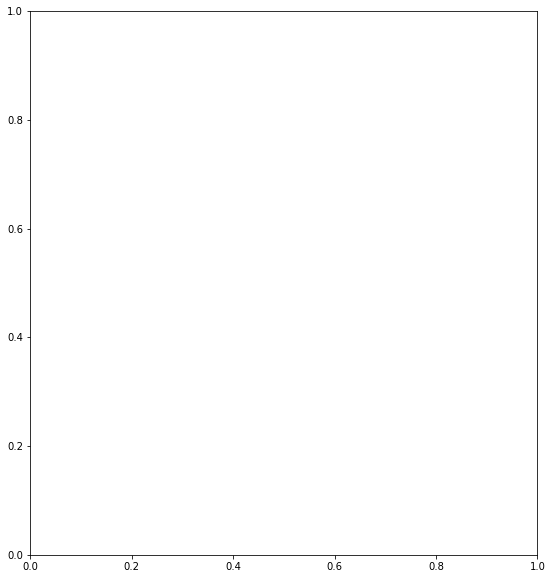

In [9]:
# show an example
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(first_image)
plt.subplot(1,2,2)
plt.imshow(first_contour)

In [10]:
# ordered files
ordered_slices = slice_order(path)
ordered_slices[:5]

[('1.3.6.1.4.1.32722.228.6.151058875740967631795723596592736472544', "-776.5"),
 ('1.3.6.1.4.1.32722.228.6.131894717145203974960544119866599202881', "-773.5"),
 ('1.3.6.1.4.1.32722.228.6.238146650655522810036680853992107926906', "-770.5"),
 ('1.3.6.1.4.1.32722.228.6.289742489145196093785642472171732440091', "-767.5"),
 ('1.3.6.1.4.1.32722.228.6.193254447269811684622194883927959166763', "-764.5")]

In [33]:
contour_dict = get_contour_dict(contour_file, path, 10)

In [34]:
images, contours = get_data(path, index=10)

In [35]:
images = torch.Tensor(np.stack([images]).astype("float32"))

In [36]:
contours = torch.Tensor(np.stack([contours]).astype("float32"))

In [25]:
subject = tio.Subject(
    input_tensor=tio.ScalarImage(tensor=images),
    mask=tio.LabelMap(tensor=contours)
)

In [26]:
cropper = tio.CropOrPad(mask_name="mask",
                        target_shape = (100, 180, 400),
                        padding_mode=0)

In [27]:
cropped = cropper(subject)

In [28]:
c = cropped.input_tensor.numpy()

In [29]:
c[0].shape

(100, 180, 400)

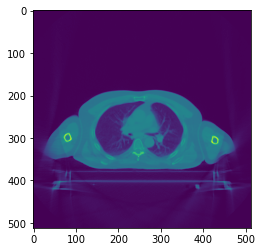

In [37]:
plt.imshow(images[0][70])

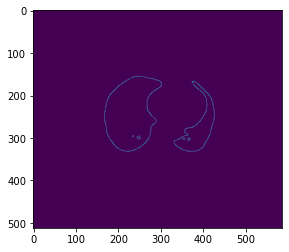

In [36]:
cntr = contours[50]
plt.imshow(cntr)

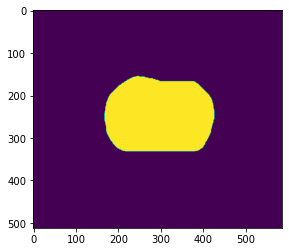

In [37]:
filled_cntr = fill_contour(cntr)
plt.imshow(filled_cntr)

In [38]:
images_3d = np.stack([images[i] for i in range(images.shape[0])])

In [39]:
contour_slices = [contours[i] for i in range(contours.shape[0])]
contour_3d = [fill_contour(c) if c.max()==1 else c for c in contour_slices]

In [40]:
contour_3d = np.stack(contour_3d)

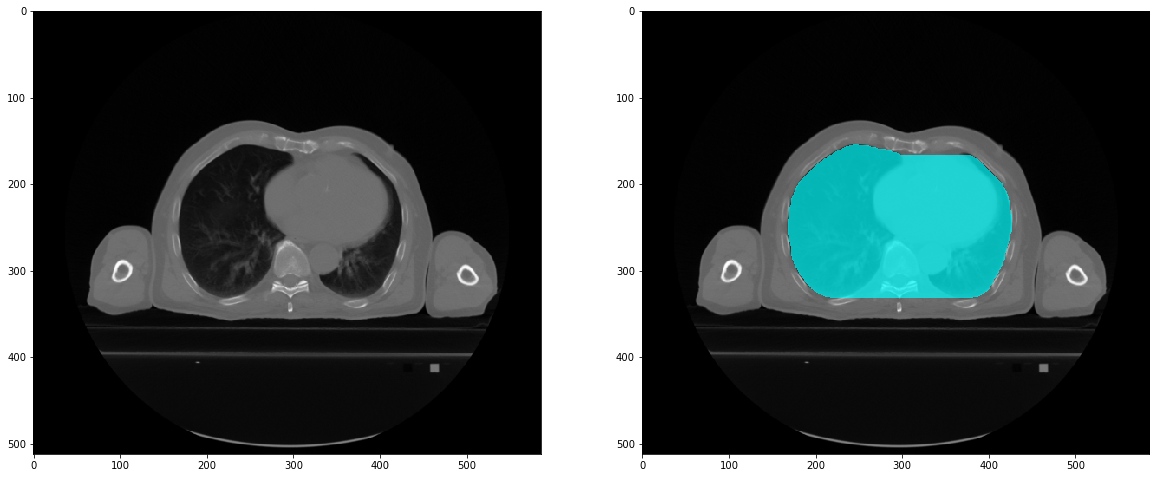

In [46]:
for img_arr, contour_arr in zip(images_3d[50:51], contour_3d[50:51]):
    plot2dcontour(img_arr, contour_arr)

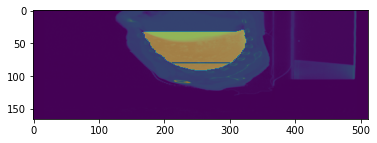

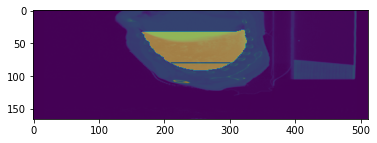

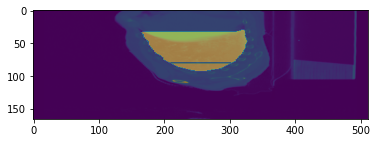

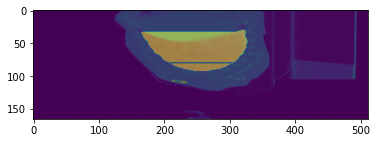

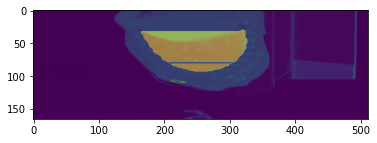

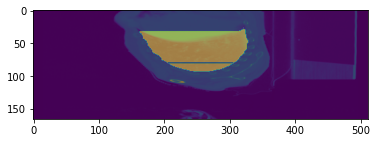

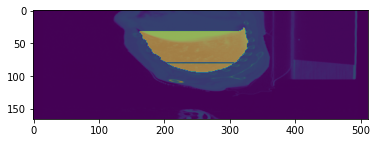

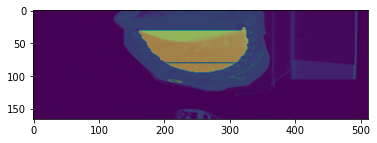

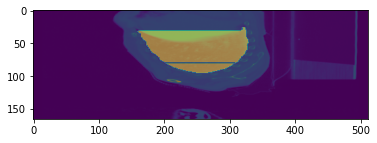

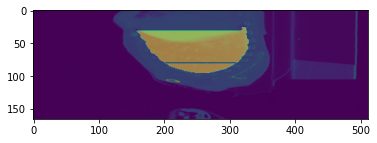

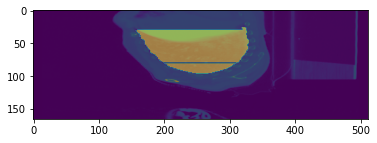

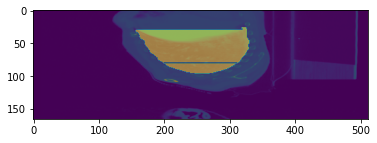

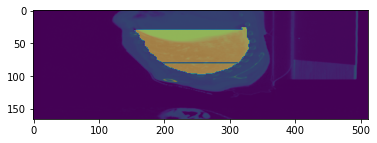

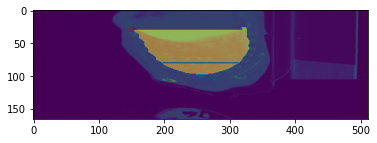

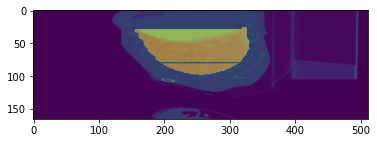

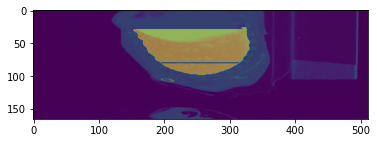

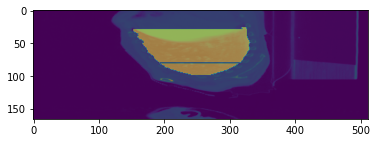

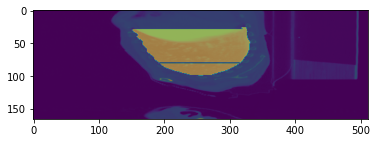

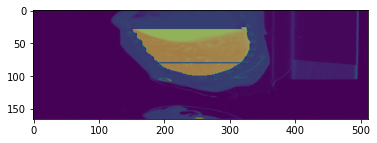

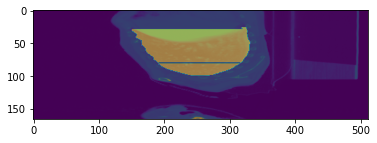

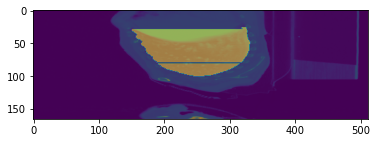

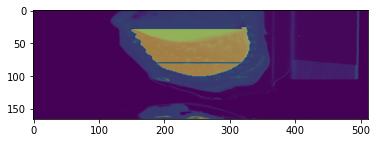

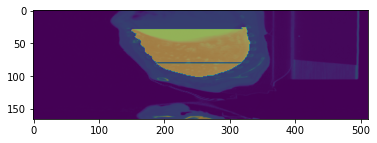

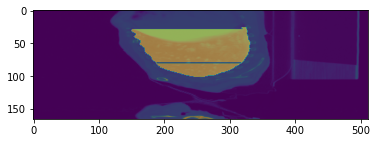

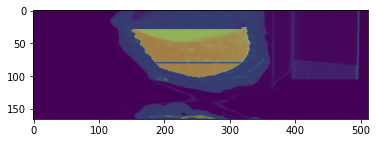

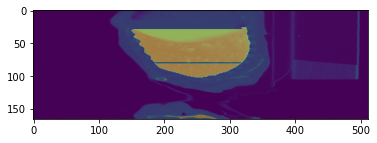

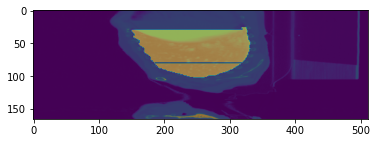

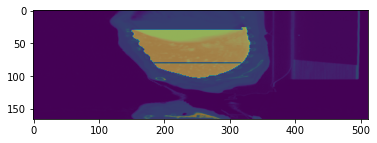

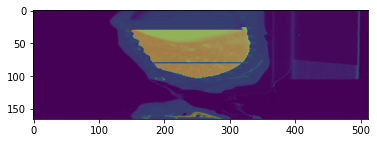

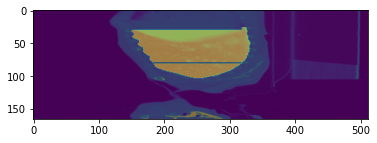

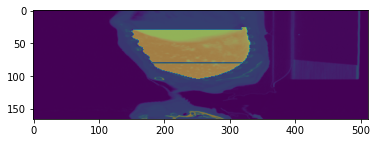

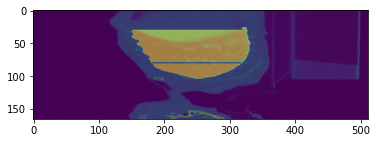

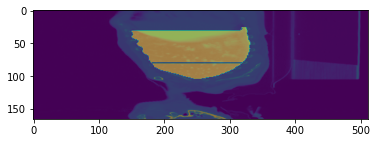

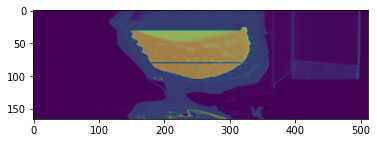

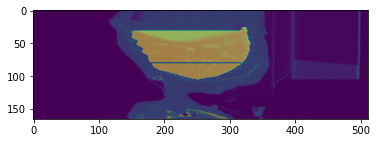

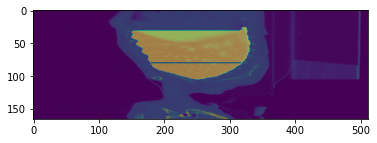

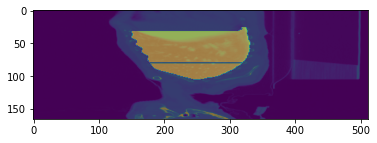

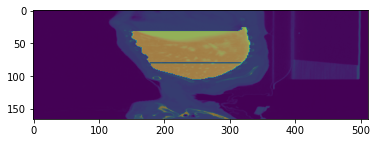

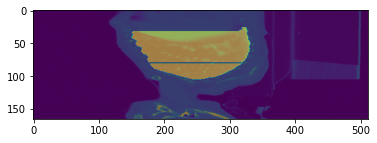

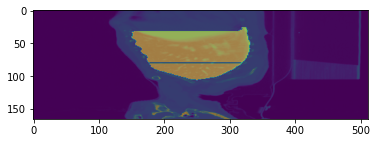

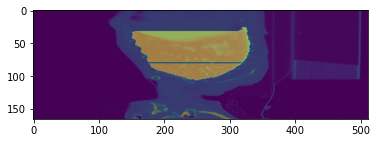

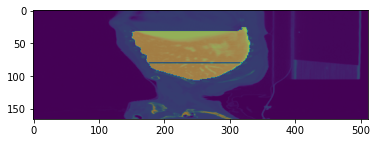

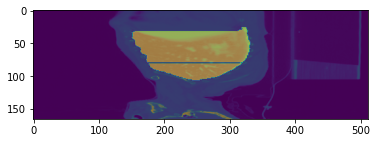

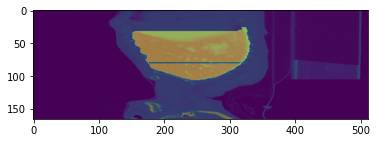

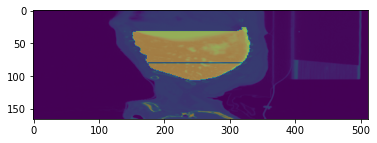

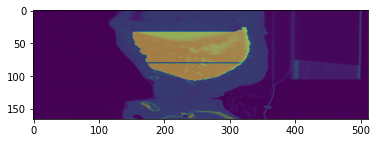

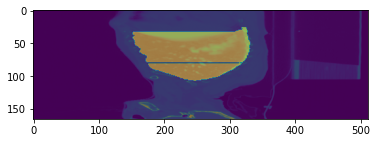

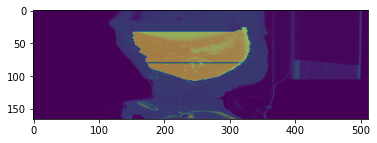

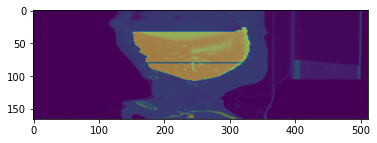

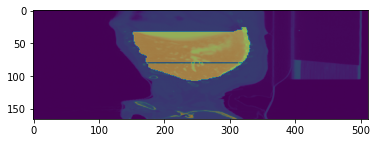

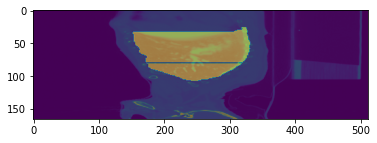

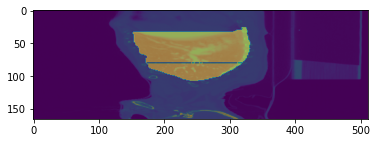

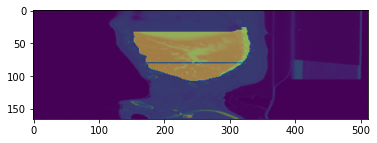

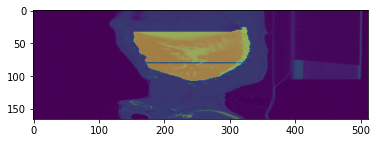

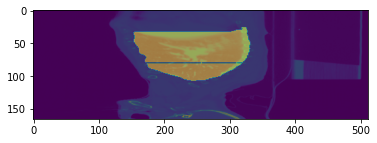

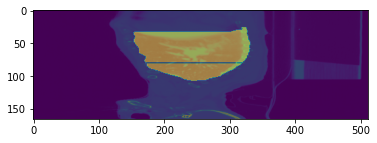

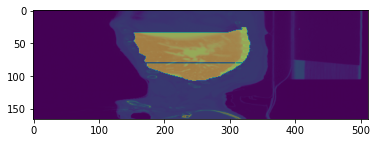

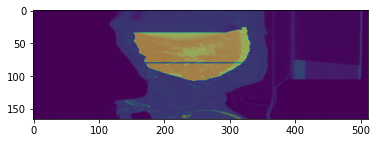

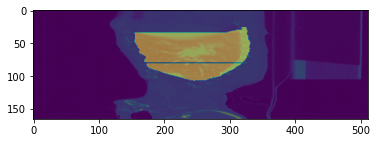

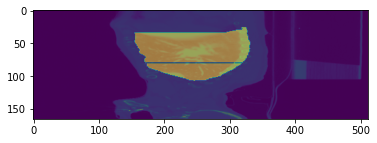

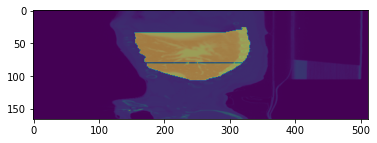

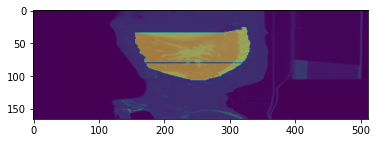

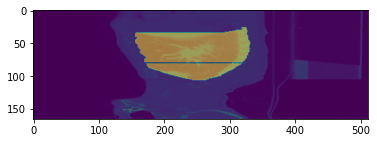

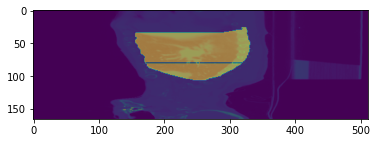

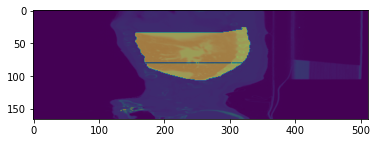

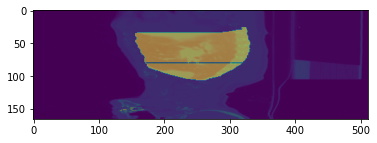

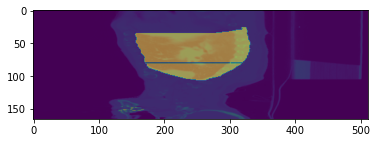

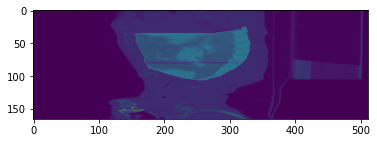

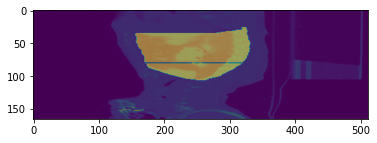

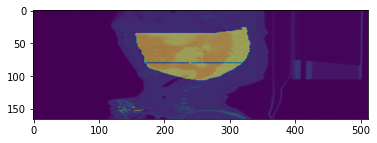

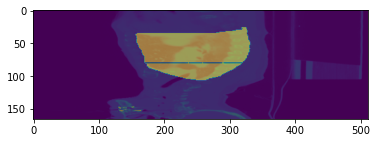

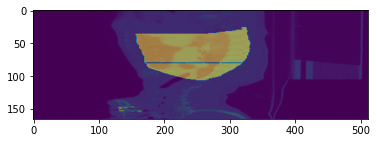

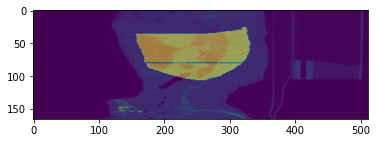

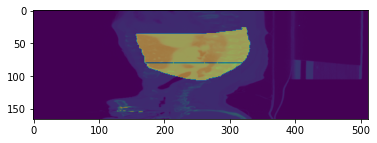

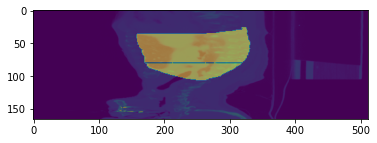

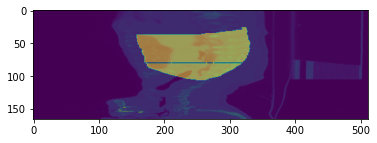

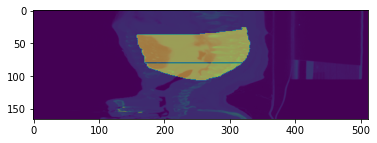

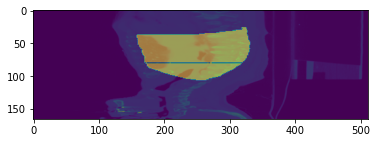

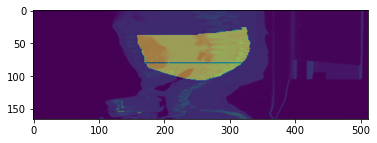

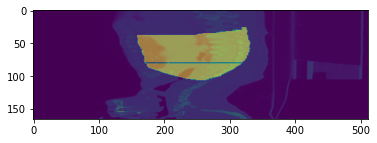

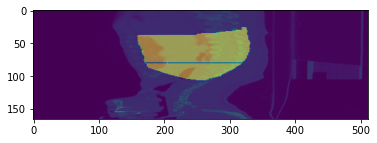

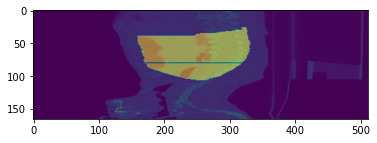

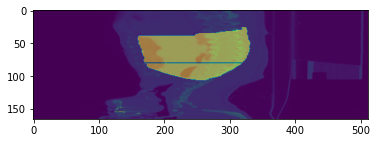

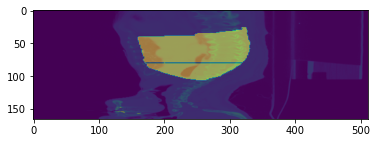

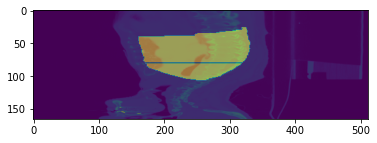

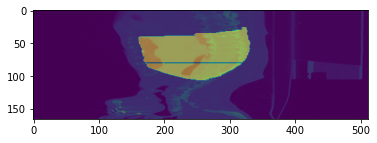

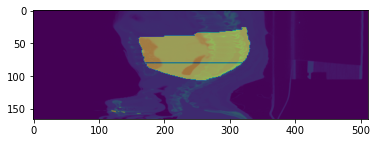

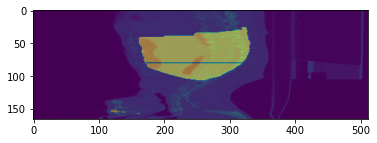

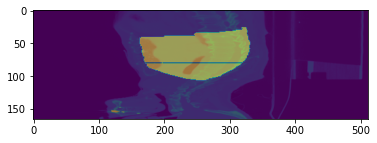

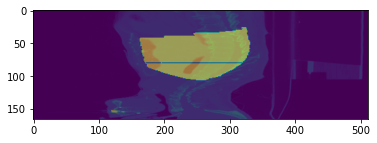

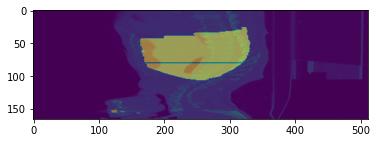

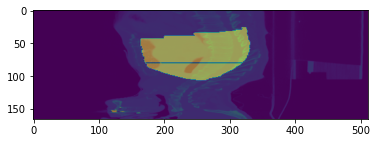

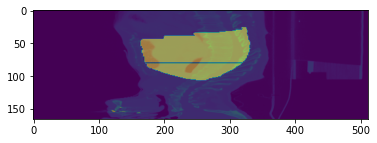

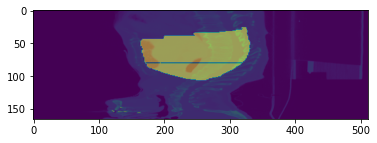

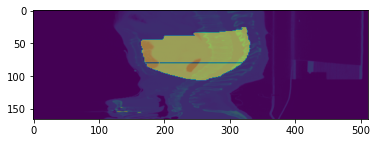

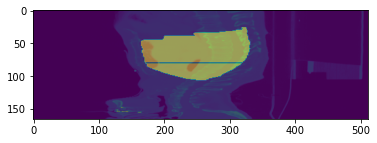

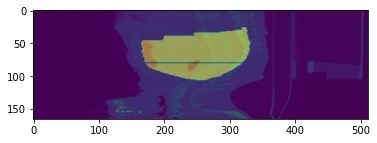

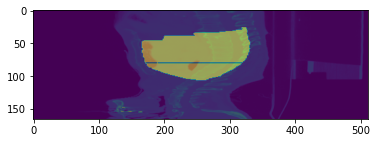

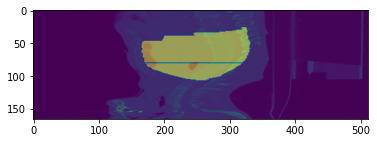

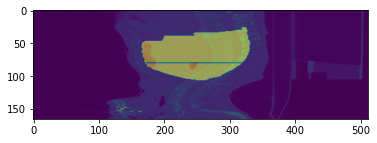

In [47]:
for i in range(200,300):
    fig = plt.figure(frameon=False)
    img1 = plt.imshow(contour_3d[:,:,i])
    img2 = plt.imshow(images_3d[:,:,i],alpha=0.5)
    plt.show()